# An Introduction to the NLTK
Source: 😊[Day 12 - Special Data Types: Natural Language Processing](https://github.com/core-skills/12-text-processing) *repository*

**Overview**: This notebook introduces the Python Natural Langauge Toolkit (*NLTK*). The NLTK is a set of modules and corpora that support natural langauge processing against a corpus of one or more texts (sentences, paragraphs, ...). This notebook only touches the surface of the capabilities of NLTK and is intended to provide a view of traditional text wrangling, pre-processing and analysis techniques. However, the NLTK is capable of both machine learning and text mining.

Note:
- *Quoted texts are derived from the respective topics Wikipedia page*
- Corpora accessed via NLTK is accessed under the The Project Gutenberg License

## Table of Contents
1. [Tokenization](#tokenization)
2. [Stop Words](#stop_words)
3. [Feature distributions](#feature_distributions)
4. [N-grams](#ngrams)
5. [Stemming](#stemming)
6. [Concordancing](#concordancing)
7. [Dispersion Plotting](#dispersion_plotting)
8. [Bi-gram Signifiance](#bigram_significance)
9. [Word contexts](#word_contexts)
10. [Word similarities](#word_similarities)
11. [Parts-of-Speech (POS)](#part_of_speech)
12. [Named entity extraction](#named_entity_recognition)

### Import Dependencies
- [nltk](https://www.nltk.org/) - library that we will use to explore traditional natural language wrangling, pre-processing and analysis

In [1]:
import nltk
from nltk.corpus import stopwords, reuters
from nltk.stem import PorterStemmer

In [2]:
# Download NLTK corpora
nltk.download('gutenberg')
nltk.download('reuters')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\22917746\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\22917746\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

### Load corpora
There are two types of text data (*corpora*) that can be used within this notebook. The first is the novel `shakespeare-hamlet` and the second is a selection of news articles provided by Reuters on the topic of `gold`.

In [6]:
corpus_type = 'shakespeare' # gold

In [7]:
if corpus_type == 'shakespeare':
    corpus = " ".join(nltk.corpus.gutenberg.words('shakespeare-hamlet.txt'))
elif corpus_type == 'gold':
    corpus = " ".join(reuters.words(reuters.fileids('gold')))
else:
    print('Please check the data type you specified as it is incorrect')
    raise ValueError

In [8]:
# View corpus
print(corpus[:250])

[ The Tragedie of Hamlet by William Shakespeare 1599 ] Actus Primus . Scoena Prima . Enter Barnardo and Francisco two Centinels . Barnardo . Who ' s there ? Fran . Nay answer me : Stand & vnfold your selfe Bar . Long liue the King Fran . Barnardo ? B


## Fundamentals of Natural Language Processing

### Tokenization <a name="tokenization"></a>

> Tokenization is the process of demarcating and possibly classifying sections of a string of input characters. The resulting tokens are then passed on to some other form of processing.

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/11/tokenization.png)

[analyticsvidhya](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/11/tokenization.png)

We use the pre-trained [Punkt](https://www.nltk.org/_modules/nltk/tokenize/punkt.html) tokenizer made available with NLTK. This tokenizer is generated via unsupervised learning on a large corpus of texts. There are many more pre-trained tokenizers available covering a broad range of tokenization techniques such as character tokenization, byte-pair encoding, sub-word, etc.

In [9]:
# Load NLTK tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\22917746\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
# Tokenize the corpus into features (words) and display 10 of them
features = nltk.word_tokenize(corpus)
print(features[:10])

['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', 'William', 'Shakespeare', '1599', ']']


In [11]:
# Normalize the features to lower case and exclude punctuation and display 10 of them
features = [feature for feature in features if feature.isalpha()]
features = [feature.lower() for feature in features]
print(features[:10])

['the', 'tragedie', 'of', 'hamlet', 'by', 'william', 'shakespeare', 'actus', 'primus', 'scoena']


### Stop Words <a name="stop_words"></a>

> Stop words usually refers to the most common words in a language, there is no single universal list of stop words"

![alt text](https://www.socialtalent.com/wp-content/uploads/2016/09/Screen-Shot-2016-09-01-at-15.01.32.png)

Similar to Punkt, the NLTK also has a resource containing common stopwords. Stopwords are domain and language specific, hence the stop words in English will be different to those in Japanese or those used in the resources industry.

In [12]:
# Load NLTK stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\22917746\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# Create a list of (English) stopwords
stopwords = stopwords.words('english')

In [14]:
# View a few stopwords
print(stopwords[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [15]:
# Remove stopwords from our set of linguistic features
features = [feature for feature in features if feature not in stopwords]
print(features[:10])

['tragedie', 'hamlet', 'william', 'shakespeare', 'actus', 'primus', 'scoena', 'prima', 'enter', 'barnardo']


### Feature (word) distribution <a name="feature_distributions"></a>

As mentioned in the previous section, there may be stopwords that are corpora specific e.g. due to the language used and its context. We can generate feature distributions over the words in our corpus to check whether we can remove more stopwords. Typically, stopwords occur very frequently and add little contextual information to the text of interest. Conversely, natural language follows a [Zipian distribution](https://en.wikipedia.org/wiki/Zipf%27s_law) where most words are rare. Rare words that occur with a frequency of 1 are referred to as **hapaxes**. Hapaxes are of interest because their removal from a languages vocabulary can aid in NLP.

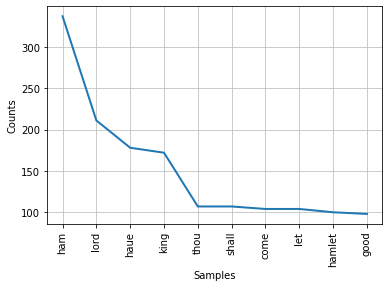

In [16]:
# Count & tabulate the features, and then plot the results
frequencies = nltk.FreqDist(features)
plot = frequencies.plot(10)

In [17]:
# Create a list of unique words (hapaxes; occur only once) and display them
hapaxes = frequencies.hapaxes()
print("\n".join([f'{idx+1}. {word}\t({frequencies[word]})' for idx, word in enumerate(hapaxes[:10])]))

1. william	(1)
2. shakespeare	(1)
3. primus	(1)
4. scoena	(1)
5. prima	(1)
6. centinels	(1)
7. carefully	(1)
8. strook	(1)
9. releefe	(1)
10. stirring	(1)


### N-grams <a name="ngrams"></a>

>An n-gram is a contiguous sequence of n items from a given sample of text or speech.

![alt text](https://images.deepai.org/glossary-terms/867de904ba9b46869af29cead3194b6c/8ARA1.png)

[deepai](https://images.deepai.org/glossary-terms/867de904ba9b46869af29cead3194b6c/8ARA1.png)

In [18]:
# Similar to before, let's compute the frequencies of bi-grams (word pairs)
# Count & tabulate ngrams from the features
ngrams = nltk.ngrams(features, 2)
frequencies = nltk.FreqDist(ngrams)

# Show the most common bi-grams
frequencies.most_common(10)

[(('lord', 'ham'), 70),
 (('good', 'lord'), 23),
 (('hamlet', 'ham'), 15),
 (('enter', 'king'), 15),
 (('wee', 'l'), 13),
 (('haue', 'seene'), 12),
 (('lord', 'hamlet'), 11),
 (('ham', 'oh'), 10),
 (('hor', 'lord'), 10),
 (('ham', 'sir'), 10)]

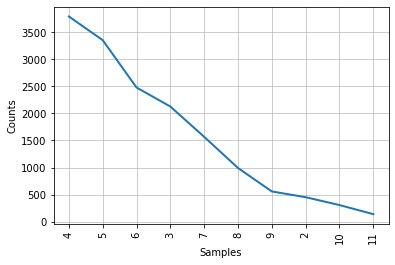

In [19]:
# Create a list each token's length, and plot the result; How many "long" words are there?
lengths = [len(feature) for feature in features]
plot = nltk.FreqDist(lengths).plot(10)

### Stemming <a name="stemming"></a>

> Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form.

<img src="https://kavita-ganesan.com/wp-content/uploads/2019/02/Screen-Shot-2019-02-15-at-2.01.37-PM.png" alt="" style="width:300px;"/>

[kavita ganesan](https://kavita-ganesan.com/wp-content/uploads/2019/02/Screen-Shot-2019-02-15-at-2.01.37-PM.png)

To further refine a corpus, we can *stem* words using the [Porter Stemming Algorithm](https://tartarus.org/martin/PorterStemmer/). This algorithm is a process for removing the commoner morphological and inflexional endings from words in English.

In [20]:
# Initialize a stemmer, stem the features, count & tabulate, and output
stemmer = PorterStemmer()
stems = [stemmer.stem(feature) for feature in features]
frequencies = nltk.FreqDist(stems)
frequencies.most_common(10)

[('ham', 337),
 ('lord', 216),
 ('king', 180),
 ('haue', 178),
 ('come', 128),
 ('hamlet', 107),
 ('let', 107),
 ('thou', 107),
 ('shall', 107),
 ('good', 98)]

## ✋ Preparing text
For the next section of this notebook, we need to recreate our corpus into features and convert them into an NLTK `Text` object. This allows us to perform concordancing and other interesting stuff.

In [21]:
# Re-create the features and create a NLTK Text object, so other cool things can be done
features = nltk.word_tokenize(corpus)
text = nltk.Text(features)

In [22]:
# Count & tabulate, again; list a given word -- try different words!
# If you're using shakespeare corpus - try Lord
# If you're using gold corpus - try Perth
frequencies = nltk.FreqDist(text)
print(frequencies['Lord'])

211


### Concordancing <a name="concordancing"></a>

> A concordance is an alphabetical list of the principal words used in a book or body of work, listing every instance of each word with its immediate context.

![alt text](https://orange3-text.readthedocs.io/en/latest/_images/Concordance-stamped.png)

[orange3](https://orange3-text.readthedocs.io/en/latest/_images/Concordance-stamped.png)

Here we perform keyword-in-context searching against the text (concordancing). If you're using the shakespeare corpus - try `Lord`. If you're using the gold corpus - try `Perth`.

In [23]:
print(text.concordance('Lord'))

Displaying 25 of 211 matches:
 thou haue Laertes ? Laer . Dread my Lord , Your leaue and fauour to returne t
t sayes Pollonius ? Pol . He hath my Lord : I do beseech you giue him leaue to
 still hang on you ? Ham . Not so my Lord , I am too much i ' th ' Sun Queen .
do forget my selfe Hor . The same my Lord , And your poore Seruant euer Ham . 
rg Horatio ? Marcellus Mar . My good Lord Ham . I am very glad to see you : go
Hor . A truant disposition , good my Lord Ham . I would not haue your Enemy sa
inke deepe , ere you depart Hor . My Lord , I came to see your Fathers Funeral
e my Mothers Wedding Hor . Indeed my Lord , it followed hard vpon Ham . Thrift
es I see my father Hor . Oh where my Lord ? Ham . In my minds eye ( Horatio ) 
t look vpon his like againe Hor . My Lord , I thinke I saw him yesternight Ham
sternight Ham . Saw ? Who ? Hor . My Lord , the King your Father Ham . The Kin
 Ham . But where was this ? Mar . My Lord vpon the platforme where we watcht H
 Did you not speake to

### Dispersion Plotting <a name="dispersion_plotting"></a>

> Dispersion plotting is a method for displaying lexical dispersion. It can be used to gain insight into where words occur in corpora or be used with temporal information.

<img src="https://i.stack.imgur.com/2gv4f.png" alt="example of temporal-lexical dispersion plot" style="height:300px;"/>

[StackOverflow](https://stackoverflow.com/q/43771135)

Here we will create a dispersion plot of a given set of words. If you're using the shakespeare corpus - try `['Lord', 'King', 'Ham']`. If you're using the gold corpus - try `['Perth', 'Australia', 'Adelaide', 'Gold']`.

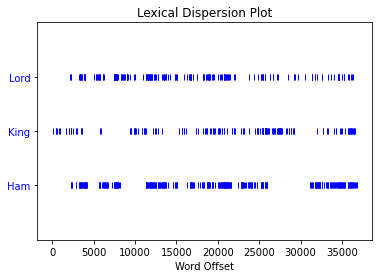

In [24]:
text.dispersion_plot(['Lord', 'King', 'Ham'])

### Bi-gram significance <a name="bigram_significance"></a>

Determine which bi-grams are the most significant considering a defined window size.

> Collocations are expressions of multiple words which commonly co-occur.

Here we will output the "most significant" bi-grams, considering surrounding words (size of window). Feel free to try different window sizes!

In [25]:
text.collocation_list(num=10, window_size=2)

[('Lord', 'Ham'),
 ('haue', 'seene'),
 ('Fathers', 'death'),
 ('Enter', 'Polonius'),
 ('thou', 'hast'),
 ('Enter', 'King'),
 ('Enter', 'Hamlet'),
 ('mine', 'owne'),
 ('set', 'downe'),
 ('wilt', 'thou')]

### Common word contexts <a name="word_contexts"></a>

> Common word contexts allows us to examine the contexts that are shared by two or more words

Given a set of words, we'll find what word are nearby. If you're using the shakespeare corpus - try `['Lord', 'King']`. If you're using the gold corpus - try `['Mine', 'Gold']`.

In [26]:
text.common_contexts(['Lord', 'King'])

my_,


### Word similarities <a name="word_similarities"></a>

Here we'll find out what words are similar to one another. This implementation should be remembered when we look at *word embeddings*. 

The method that is implemented by NLTK is "Distributional similarity: find other words which appear in the same contexts as the specified word."

Here we'll list the words (features) most associated with the given word. If you're using the shakespeare corpus - try `Lord`. If you're using the gold corpus - try `Gold`.

In [27]:
text.similar('Lord', num=10)

heart mother sonne daughter selfe come i horatio away head


### Parts-of-speech (POS) <a name="part_of_speech"></a>

> Part of speech is a category of words (or, more generally, of lexical items) that have similar grammatical properties. Words that are assigned to the same part of speech generally display similar syntactic behavior—they play similar roles within the grammatical structure of sentences—and sometimes similar morphology in that they undergo inflection for similar properties.

<img src="https://maelfabien.github.io/assets/images/pos.jpg" alt="Example of part-of-speech tagging" style="width:500px;"/>

[Maël Fabien](https://maelfabien.github.io/machinelearning/NLP_1/)

In [28]:
# Import perceptron tagger
# POS is a supervised learning process so we need to load in a ML model to aid us.
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\22917746\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [29]:
# create a list of sentences, and display one -- season to taste
sentences = nltk.sent_tokenize(corpus)
sentence  = sentences[14]
print(sentence)

Haue you had quiet Guard ?


In [30]:
# Tokenize the sentence and parse it into parts-of-speech, all in one go.
sentence = nltk.pos_tag(nltk.word_tokenize(sentence))
print(sentence)

[('Haue', 'NNP'), ('you', 'PRP'), ('had', 'VBD'), ('quiet', 'JJ'), ('Guard', 'NNP'), ('?', '.')]


### Chunking and Named entity recognition <a name="named_entity_recognition"></a> 

**Chunking:** "Chunking is a process of extracting phrases from unstructured text."<br>

![alt text](https://www.tutorialkart.com/wp-content/uploads/2017/06/chunker_ex.png)

[tutorialkart](https://www.tutorialkart.com/wp-content/uploads/2017/06/chunker_ex.png)

In [31]:
# Import chunker and wordlist corpus
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\22917746\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\22917746\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [32]:
# Extract named enities from a sentence, and print the results
# chunking
entities = nltk.ne_chunk(sentence)
print(entities)

(S Haue/NNP you/PRP had/VBD quiet/JJ (PERSON Guard/NNP) ?/.)


### Visualisation Tree

Output the entities graphically. Currently doesn't work in Google Colab, however the image shown is similar to what would be expected.

![Entity Tree](https://www.nltk.org/book/tree_images/ch07-tree-2.png)

[NLTK](https://www.nltk.org/book/tree_images/ch07-tree-2.png)

This is the end of the Notebook. I hope you found it useful.